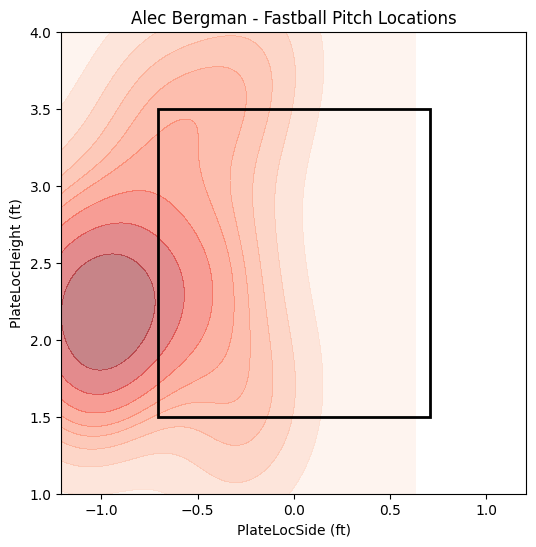

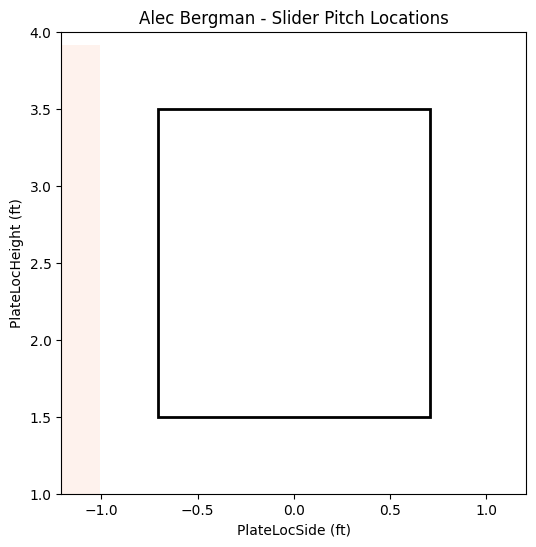

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

def plot_strikezone_heatmap(pitcher_name, data_path='your_data.csv'):
    # Load the dataset
    data = pd.read_csv(data_path)
    
    # Filter data for the specified pitcher
    pitcher_data = data[data['Pitcher'] == pitcher_name]
    
    if pitcher_data.empty:
        print(f"No data found for pitcher: {pitcher_name}")
        return
    
    # Get unique pitch types for this pitcher
    pitch_types = pitcher_data['TaggedPitchType'].unique()
    
    if len(pitch_types) == 0:
        print(f"No pitch types found for pitcher: {pitcher_name}")
        return
    
    # Define the strike zone boundaries (in feet, approximate)
    strike_zone = {
        'x_min': -.708,  # Left edge of the plate
        'x_max': .708,   # Right edge of the plate
        'y_min': 1.5,   # Bottom of the strike zone
        'y_max': 3.5    # Top of the strike zone
    }
    
    # Create a figure for each pitch type
    for pitch_type in pitch_types:
        # Filter data for the current pitch type
        pitch_type_data = pitcher_data[pitcher_data['TaggedPitchType'] == pitch_type]
        
        if pitch_type_data.empty:
            print(f"No pitches of type {pitch_type} found for {pitcher_name}")
            continue
        
        # Set up the plot
        plt.figure(figsize=(6, 6))
        
        # Create heatmap using seaborn's kdeplot for density
        sns.kdeplot(
            x=pitch_type_data['PlateLocSide'],
            y=pitch_type_data['PlateLocHeight'],
            cmap='Reds',
            fill=True,
            levels=10,
            thresh=0,
            alpha=0.5
        )
        
        # Add strike zone rectangle
        strike_zone_rect = Rectangle(
            (strike_zone['x_min'], strike_zone['y_min']),
            strike_zone['x_max'] - strike_zone['x_min'],
            strike_zone['y_max'] - strike_zone['y_min'],
            fill=False,
            edgecolor='black',
            linewidth=2
        )
        plt.gca().add_patch(strike_zone_rect)
        
        # Add home plate (approximate shape)
        plate = Polygon([
            (-0.708, 0), (0.708, 0), (0.708, -0.2), (0, -0.4), (-0.708, -0.2)
        ], closed=True, fill=False, edgecolor='black', linewidth=1)
        plt.gca().add_patch(plate)
        
        # Set plot title and labels
        plt.title(f'{pitcher_name} - {pitch_type} Pitch Locations')
        plt.xlabel('PlateLocSide (ft)')
        plt.ylabel('PlateLocHeight (ft)')
        
        # Set axis limits to focus on the strike zone
        plt.xlim(strike_zone['x_min'] - 0.5, strike_zone['x_max'] + 0.5)
        plt.ylim(strike_zone['y_min'] - 0.5, strike_zone['y_max'] + 0.5)
        
        # Save the plot
        plt.savefig(f'heatmap/{pitcher_name}_{pitch_type}_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

# Example usage
if __name__ == "__main__":
    # Replace 'your_data.csv' with the actual path to your dataset
    data_path = 'Data/modified_yakkertech_file.csv'
    pitcher_name = "Alec Bergman"  # Replace with desired pitcher name
    plot_strikezone_heatmap(pitcher_name, data_path)